# Covid-19 - Auswertung RKI Daten

Ziel ist es die Inzidenz aus den Roh-Daten des RKI mal selbst zu rechnen 

Work in progress! - Errechnete Inzedenzen passen zu denen des RKI Dashboards

Stand: 22.12.2020

In [ ]:
'''
source: https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74
source: Einwohner: https://de.wikipedia.org/wiki/Wetteraukreis
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#url="https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data"
#s=requests.get(url).content
#rki=pd.read_csv(s)

In [4]:
#rki = pd.read_csv('RKI_COVID19.csv')

In [89]:
rki = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv')

In [90]:
#Wetteraukreis
vLandkreis = 'LK Wetteraukreis'
vLK_Einwohner = 308339

#Limburg-Weilburg
#vLandkreis = 'LK Limburg-Weilburg'
#vLK_Einwohner = 171912

In [91]:
lk = pd.DataFrame(rki[['Meldedatum','Bundesland','Landkreis','AnzahlFall','NeuerFall']])[rki['NeuerFall'].isin([0,1])][rki['Landkreis']==vLandkreis]
lk['Meldedatum'] = lk['Meldedatum'].astype('datetime64[ns]')
lk['Meldedatum'] = lk['Meldedatum'].dt.date
lk.set_index('Meldedatum')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Bundesland,Landkreis,AnzahlFall,NeuerFall
Meldedatum,,,,
2020-05-14,Hessen,LK Wetteraukreis,1,0
2020-05-19,Hessen,LK Wetteraukreis,1,0
2020-05-19,Hessen,LK Wetteraukreis,1,0
2020-06-07,Hessen,LK Wetteraukreis,1,0
2020-07-19,Hessen,LK Wetteraukreis,1,0
...,...,...,...,...
2020-12-21,Hessen,LK Wetteraukreis,17,1
2020-11-18,Hessen,LK Wetteraukreis,1,0
2020-12-13,Hessen,LK Wetteraukreis,1,0


In [92]:
lk_groupby = lk.groupby(['Meldedatum']).AnzahlFall.sum()
lk_groupby = pd.DataFrame(lk_groupby)
lk_groupby['rolling_sum'] = lk_groupby['AnzahlFall'].rolling(7).sum()
lk_groupby['inzidenzPro100000'] = lk_groupby['rolling_sum'] / vLK_Einwohner * 100000

In [97]:
#lk_groupby_old = lk_groupby

In [98]:
lk_groupby.tail()

,AnzahlFall,rolling_sum,inzidenzPro100000
Meldedatum,,,
2020-12-17,98,794.0,257.508781
2020-12-18,143,735.0,238.373997
2020-12-19,119,789.0,255.887189
2020-12-20,14,670.0,217.293304
2020-12-21,47,629.0,203.996251


In [99]:
lk_groupby_old.tail(30)

,AnzahlFall,rolling_sum,inzidenzPro100000
Meldedatum,,,
2020-11-22,23,495.0,160.537590
2020-11-23,37,479.0,155.348496
2020-11-24,54,428.0,138.808260
2020-11-25,100,427.0,138.483941
2020-11-26,79,417.0,135.240758
2020-11-27,94,437.0,141.727125
2020-11-28,55,442.0,143.348717
2020-11-29,20,439.0,142.375762
2020-11-30,37,439.0,142.375762


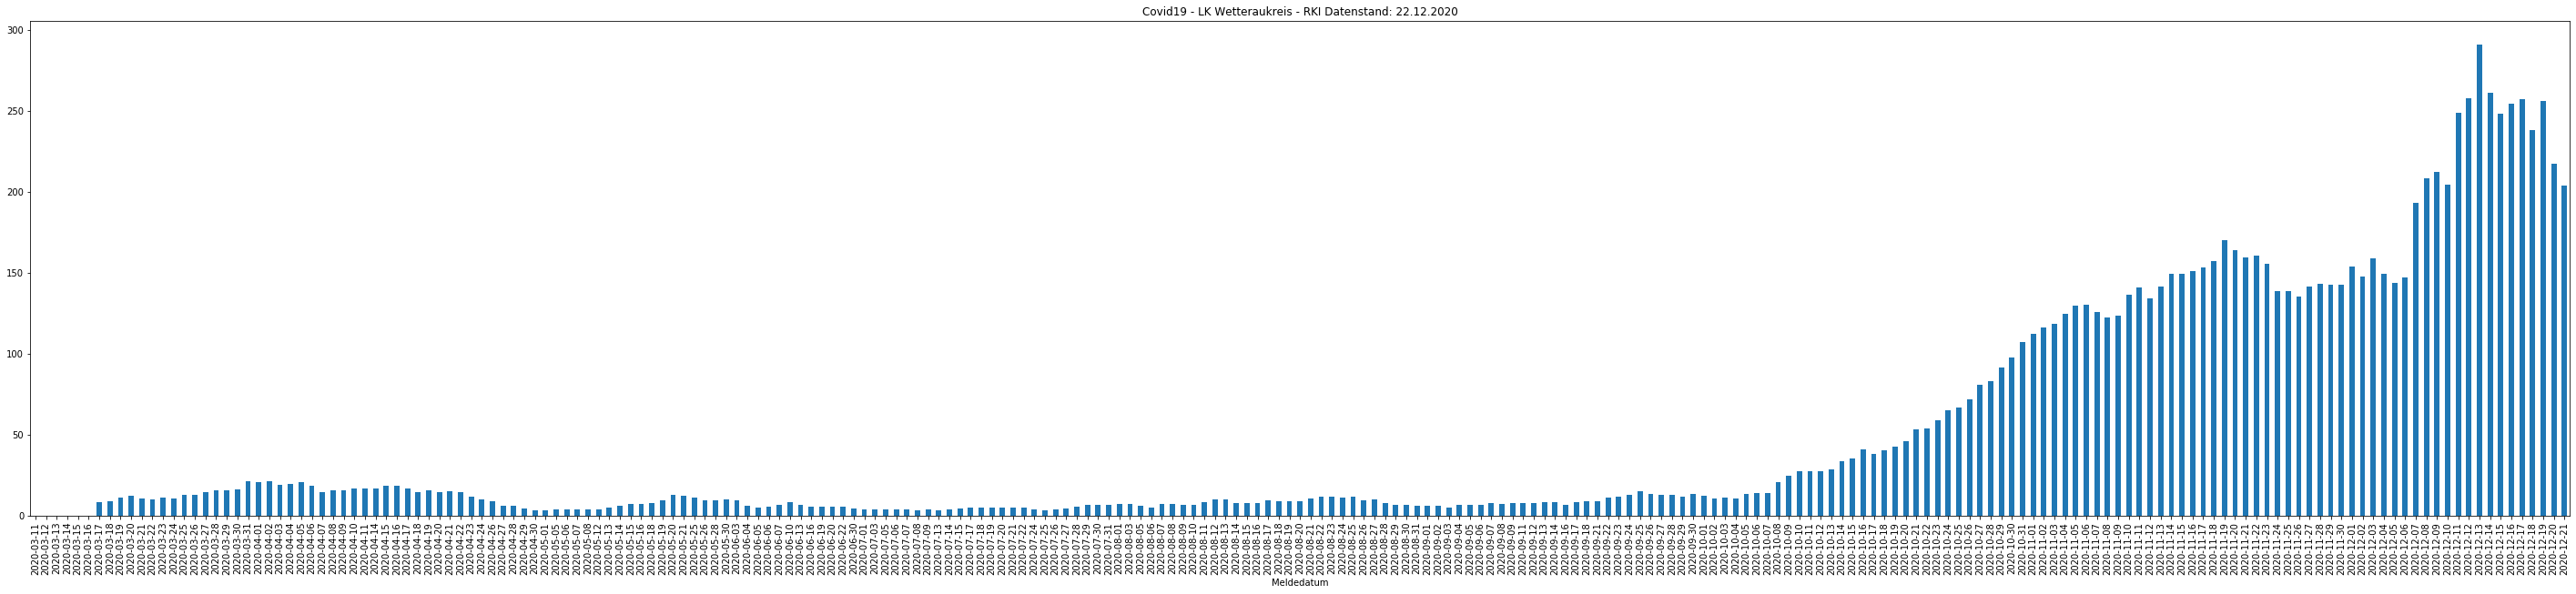

In [100]:
thePlotGADaten = lk_groupby['inzidenzPro100000'].plot(kind="bar",figsize=(50,10), title=f'Covid19 - {vLandkreis} - RKI Datenstand: ' + rki['Datenstand'][0][0:10])
#for x,y in zip('inzidenzPro100000','inzidenzPro100000'):

    #label = "{:.2f}".format(y)
#    label = y

#    plt.annotate(label, # this is the text
#                 (x,y), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,10), # distance from text to points (x,y)
#                 ha='center') # horizontal alignment can be left, right or center
#
#plt.show()

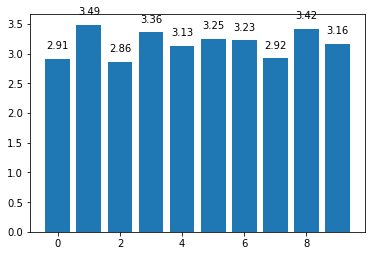

In [398]:
#TESTING!!!

plt.clf()

# using some dummy data for this example
xs = np.arange(0,10,1)
ys = np.random.normal(loc=3, scale=0.4, size=10)

plt.bar(xs,ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [512]:
#rki = rki[rki.Geschlecht.str.contains("unbekannt") == False]
#rki = rki[rki.Altersgruppe.str.contains("unbekannt") == False]

In [101]:
rki[['Bundesland','Geschlecht','Altersgruppe','AnzahlFall','AnzahlTodesfall']]

,Bundesland,Geschlecht,Altersgruppe,AnzahlFall,AnzahlTodesfall
0,Schleswig-Holstein,M,A00-A04,1,0
1,Schleswig-Holstein,M,A00-A04,1,0
2,Schleswig-Holstein,M,A00-A04,1,0
3,Schleswig-Holstein,M,A00-A04,1,0
4,Schleswig-Holstein,M,A00-A04,1,0
...,...,...,...,...,...
790936,Thüringen,W,A80+,1,0
790937,Thüringen,W,A80+,33,0
790938,Thüringen,W,A80+,15,0
790939,Thüringen,W,A80+,5,0


In [81]:
GADaten = rki[['Bundesland','Geschlecht','Altersgruppe','AnzahlFall','AnzahlTodesfall']][rki['Landkreis']=='LK Wetteraukreis'].groupby(['Geschlecht','Altersgruppe']).sum().sort_values(by=["Altersgruppe"])

In [82]:
GADaten

AnzahlFall  AnzahlTodesfall
Geschlecht Altersgruppe                             
M          A00-A04               34                0
W          A00-A04               35                0
unbekannt  A05-A14                2                0
W          A05-A14              106                0
M          A05-A14              137                0
           A15-A34              713                0
W          A15-A34              729                0
unbekannt  A15-A34                3                0
           A35-A59                2                0
W          A35-A59             1023                1
M          A35-A59              924                3
           A60-A79              390               20
W          A60-A79              432                9
M          A80+                 224               39
W          A80+                 489               42
unbekannt  A80+                   1                0
M          unbekannt              1                0
W          unbekannt              3                0

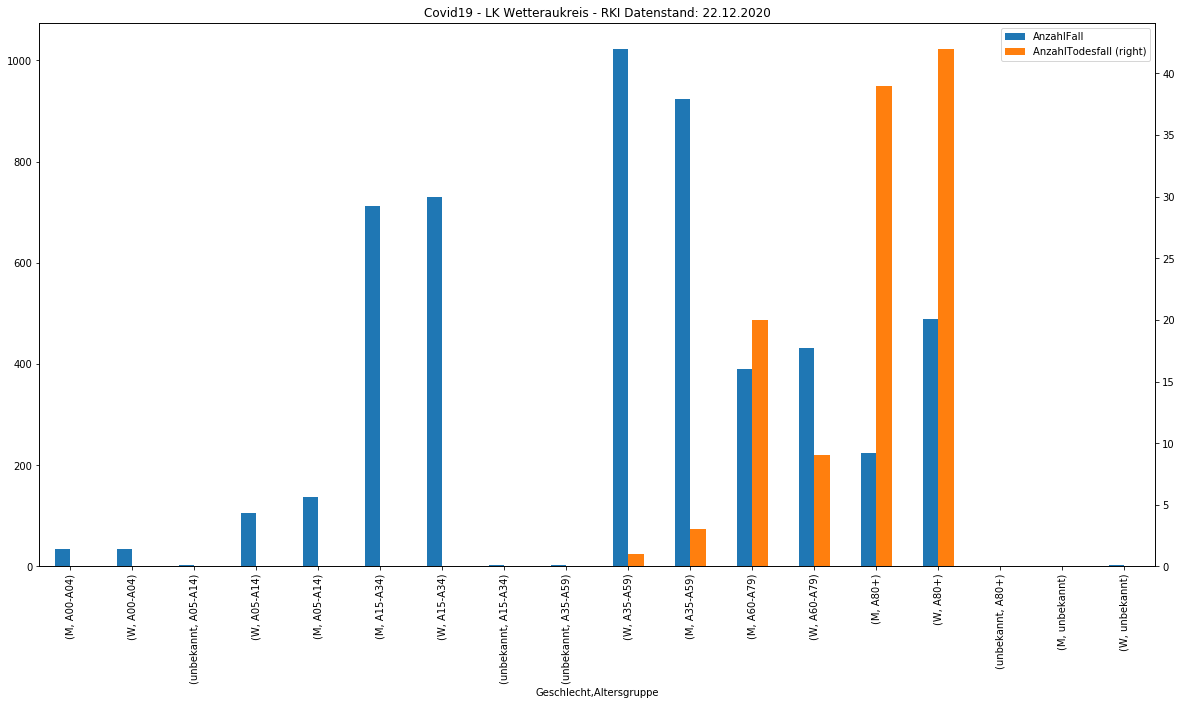

In [83]:
#thePlotGADaten = GADaten.plot(kind="bar",figsize=(20,10), title='Covid19 - LK Wetterau - RKI Datenstand: ' + rki['Datenstand'][0][0:10])
thePlotGADaten = GADaten.plot(kind="bar",secondary_y="AnzahlTodesfall",figsize=(20,10), title=f'Covid19 - {vLandkreis} - RKI Datenstand: ' + rki['Datenstand'][0][0:10])

thePlotGADaten.get_figure().savefig('geschlecht-altersgruppe.png',dpi=200,pad_inches=5)

In [84]:
lk['AnzahlFall'].sum()

5248